<a href="https://colab.research.google.com/github/Pravallikavyas/Linear-Regression/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [27]:
df1=pd.read_csv('/content/train.csv')

In [28]:
df1

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [29]:
df1.shape

(400, 15)

In [30]:
df1.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [31]:
df1.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [32]:
df1=df1.drop_duplicates()

In [33]:
df1.corr()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,1.000000,-0.009895,-0.037340,0.005167,-0.034274,-0.034631,0.061728,-0.031016,0.010385,-0.031669,-0.007460,0.056734,-0.030764,-0.019382,0.006956
CRIM,-0.009895,1.000000,-0.193548,0.409972,-0.060591,0.422635,-0.205928,0.353379,-0.376323,0.618538,0.577501,0.284967,-0.357581,0.442743,-0.393693
ZN,-0.037340,-0.193548,1.000000,-0.522218,-0.037318,-0.497638,0.290127,-0.554214,0.659949,-0.301067,-0.300221,-0.369974,0.161515,-0.402116,0.336805
INDUS,0.005167,0.409972,-0.522218,1.000000,0.075305,0.759132,-0.396865,0.631742,-0.695199,0.608088,0.731619,0.370383,-0.338007,0.624374,-0.502898
CHAS,-0.034274,-0.060591,-0.037318,0.075305,1.000000,0.084020,0.091267,0.083314,-0.102016,-0.023792,-0.045183,-0.137556,0.040732,-0.055326,0.182096
NOX,-0.034631,0.422635,-0.497638,0.759132,0.084020,1.000000,-0.283907,0.736349,-0.768775,0.602960,0.657875,0.154693,-0.382202,0.622209,-0.434271
RM,0.061728,-0.205928,0.290127,-0.396865,0.091267,-0.283907,1.000000,-0.198918,0.171596,-0.190030,-0.277064,-0.336408,0.120518,-0.634758,0.721489
AGE,-0.031016,0.353379,-0.554214,0.631742,0.083314,0.736349,-0.198918,1.000000,-0.750408,0.457339,0.499478,0.234894,-0.274650,0.593788,-0.354106
DIS,0.010385,-0.376323,0.659949,-0.695199,-0.102016,-0.768775,0.171596,-0.750408,1.000000,-0.492090,-0.520442,-0.185938,0.274036,-0.503383,0.235087
RAD,-0.031669,0.618538,-0.301067,0.608088,-0.023792,0.602960,-0.190030,0.457339,-0.492090,1.000000,0.911103,0.458930,-0.395845,0.503532,-0.386922


In [34]:
df1.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
iqr = df1.CRIM.quantile(0.75) - df1.CRIM.quantile(0.25)
upper_threshold = df1.CRIM.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.CRIM.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(8.74183875, -5.1205912499999995)

In [36]:
df1.CRIM = df1.CRIM.clip(8,-5)

In [37]:
iqr = df1.ZN.quantile(0.75) - df1.ZN.quantile(0.25)
upper_threshold = df1.ZN.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.ZN.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(31.25, -18.75)

In [38]:
df1.ZN=df1.ZN.clip(31,-18)

In [39]:
iqr = df1.INDUS.quantile(0.75) - df1.INDUS.quantile(0.25)
upper_threshold = df1.INDUS.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.INDUS.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(37.55500000000001, -14.325000000000006)

In [40]:
iqr = df1.NOX.quantile(0.75) - df1.NOX.quantile(0.25)
upper_threshold = df1.NOX.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.NOX.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(0.8865, 0.18650000000000005)

In [41]:
iqr = df1.RM.quantile(0.75) - df1.RM.quantile(0.25)
upper_threshold = df1.RM.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.RM.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(7.734999999999999, 4.763000000000002)

In [42]:
df1.RM=df1.RM.clip(7,4)

In [43]:
iqr = df1.AGE.quantile(0.75) - df1.AGE.quantile(0.25)
upper_threshold = df1.AGE.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.AGE.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(171.0, -34.80000000000001)

In [44]:
iqr = df1.DIS.quantile(0.75) - df1.DIS.quantile(0.25)
upper_threshold = df1.DIS.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.DIS.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(9.872775, -2.549025)

In [45]:
df1.DIS=df1.DIS.clip(9,-2)

In [46]:
iqr = df1.RAD.quantile(0.75) - df1.RAD.quantile(0.25)
upper_threshold = df1.RAD.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.RAD.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(54.0, -26.0)

In [47]:
iqr = df1.TAX.quantile(0.75) - df1.TAX.quantile(0.25)
upper_threshold = df1.TAX.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.TAX.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(1249.5, -306.5)

In [48]:
iqr = df1.PTRATIO.quantile(0.75) - df1.PTRATIO.quantile(0.25)
upper_threshold = df1.PTRATIO.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.PTRATIO.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(24.4, 13.199999999999998)

In [49]:
iqr = df1.LSTAT.quantile(0.75) - df1.LSTAT.quantile(0.25)
upper_threshold = df1.LSTAT.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.LSTAT.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(31.79, -7.889999999999999)

In [50]:
df1.LSTAT=df1.LSTAT.clip(31,-7)

AttributeError: ignored

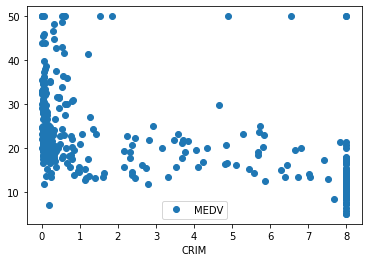

In [52]:
df1.plot(x='CRIM', y='MEDV', style='o')
plt.title('CRIM vs MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

In [53]:
df1[['CRIM','MEDV']].corr()

,CRIM,MEDV
CRIM,1.000000,-0.463055
MEDV,-0.463055,1.000000


AttributeError: ignored

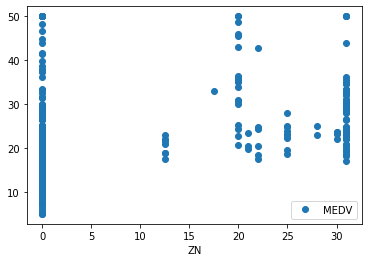

In [55]:
df1.plot(x='ZN', y='MEDV', style='o')
plt.title('ZN vs MEDV')
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.show()

In [56]:
df1[['ZN','MEDV']].corr()

,ZN,MEDV
ZN,1.000000,0.361476
MEDV,0.361476,1.000000


AttributeError: ignored

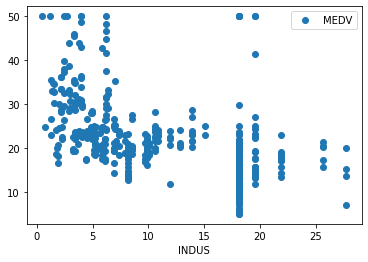

In [57]:
df1.plot(x='INDUS', y='MEDV', style='o')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

In [58]:
df1[['INDUS','MEDV']].corr()

,INDUS,MEDV
INDUS,1.000000,-0.502898
MEDV,-0.502898,1.000000


AttributeError: ignored

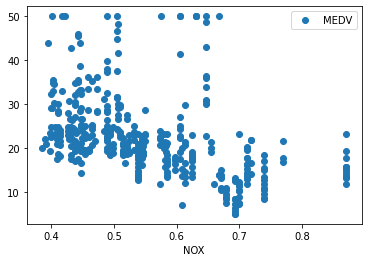

In [59]:
df1.plot(x='NOX', y='MEDV', style='o')
plt.title('NOX vs MEDV')
plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.show()

In [60]:
df1[['NOX','MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.434271
MEDV,-0.434271,1.000000


AttributeError: ignored

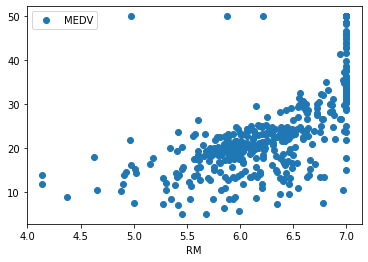

In [61]:
df1.plot(x='RM', y='MEDV', style='o')
plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [62]:
df1[['RM','MEDV']].corr()

,RM,MEDV
RM,1.000000,0.619158
MEDV,0.619158,1.000000


AttributeError: ignored

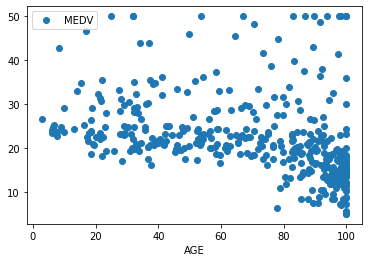

In [63]:
df1.plot(x='AGE', y='MEDV', style='o')
plt.title('AGE vs MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

In [64]:
df1[['AGE','MEDV']].corr()

,AGE,MEDV
AGE,1.000000,-0.354106
MEDV,-0.354106,1.000000


AttributeError: ignored

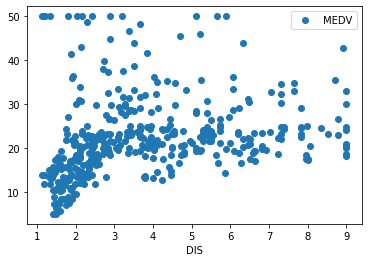

In [65]:
df1.plot(x='DIS', y='MEDV', style='o')
plt.title('DIS vs MEDV')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

In [66]:
df1[['DIS','MEDV']].corr()

,DIS,MEDV
DIS,1.000000,0.242289
MEDV,0.242289,1.000000


AttributeError: ignored

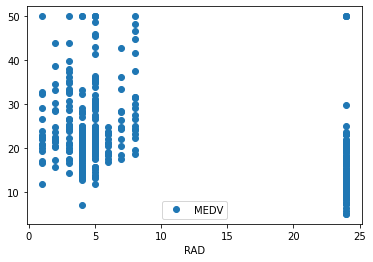

In [67]:
df1.plot(x='RAD', y='MEDV', style='o')
plt.title('RAD vs MEDV')
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.show()

In [68]:
df1[['RAD','MEDV']].corr()

,RAD,MEDV
RAD,1.000000,-0.386922
MEDV,-0.386922,1.000000


AttributeError: ignored

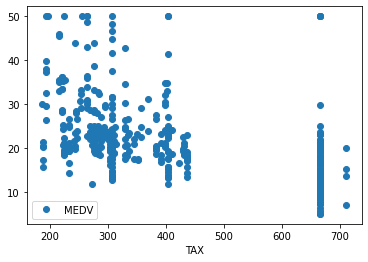

In [69]:
df1.plot(x='TAX', y='MEDV', style='o')
plt.title('TAX vs MEDV')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()

In [70]:
df1[['TAX','MEDV']].corr()

,TAX,MEDV
TAX,1.000000,-0.479308
MEDV,-0.479308,1.000000


AttributeError: ignored

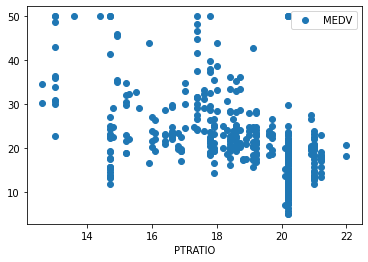

In [71]:
df1.plot(x='PTRATIO', y='MEDV', style='o')
plt.title('PTRATIO vs MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

In [72]:
df1[['PTRATIO','MEDV']].corr()

,PTRATIO,MEDV
PTRATIO,1.000000,-0.495904
MEDV,-0.495904,1.000000


AttributeError: ignored

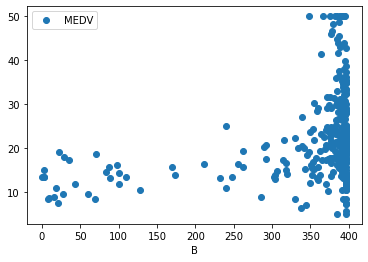

In [73]:
df1.plot(x='B', y='MEDV', style='o')
plt.title('B vs MEDV')
plt.xlabel('B')
plt.ylabel('MEDV')
plt.show()

In [74]:
df1[['B','MEDV']].corr()

,B,MEDV
B,1.00000,0.31791
MEDV,0.31791,1.00000


AttributeError: ignored

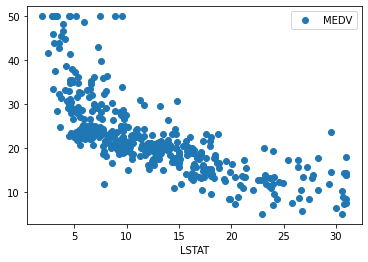

In [75]:
df1.plot(x='LSTAT', y='MEDV', style='o')
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [76]:
df1[['LSTAT','MEDV']].corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.733843
MEDV,-0.733843,1.000000


In [77]:
X = df1.loc[:, ['LSTAT','B','TAX','AGE','CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','RAD','PTRATIO']].values # select all rows and select all columns except the last column as my feature
y = df1.loc[:, 'MEDV'].values

In [78]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [79]:
print(regressor.intercept_)

48.3740561858852


In [80]:
print(regressor.coef_)

[-6.35259772e-01  8.53548272e-03 -1.33130547e-02  1.03704900e-02
 -2.03943684e-01  3.91475703e-02 -4.79614647e-02  3.18306675e+00
 -1.79818515e+01  2.80961530e+00 -1.46267066e+00  3.49551135e-01
 -1.14351745e+00]


In [81]:
df2=pd.read_csv('/content/test.csv')

In [82]:
df2

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05


In [83]:
X1= df2.loc[:, ['LSTAT','B','TAX','AGE','CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','RAD','PTRATIO']].values

In [84]:
y_pred = regressor.predict(X1)

In [90]:
y_pred

array([24.73830669, 25.63351925, 15.27067934, 19.21452689, 23.7775497 ,
       22.78206809, 17.42819974, 22.69949736, 34.35050347, 19.68463721,
       26.95710377, 23.03222321, 20.63175055, 16.45188909, 21.07559065,
       28.16904994, 16.95334129, 25.0624195 , 20.08847145, 22.6109138 ,
       26.8230645 , 36.80316868, 24.86139376,  8.62159365, 14.03197837,
       12.16012143, 16.04137051, 21.16004988, 24.08054958, 14.7357862 ,
       37.06805884, 18.262588  , 18.84645691, 19.22560599, 27.11987605,
       20.59904299, 31.42048581, 31.06703533, 40.54068875, 25.04211271,
       16.6837058 , 33.24001684, 25.84395445, 16.821233  , 22.38520913,
       26.74759042, 17.36034366, 24.59843043, 14.19022775, 12.92262281,
       19.50502108, 34.05535379, 24.4198747 , -9.29159647, 11.49493553,
       15.24169592, 21.45783919, 12.0968183 ,  6.24056442, 18.42983631,
       19.48049233, 19.67835697, 34.14275994, 24.8913159 , 37.02740891,
       33.27557348, 13.56761846, 21.14327711, 25.92143272, 15.08

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X1=scaler.transform(X1)

In [102]:
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(X,y)
lr.score(X1,y_pred)


0.9998743832723933

In [105]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr.fit(X,y)
lr.score(X1,y_pred)

0.8900637123875508